11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


d:\Apk\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8981 - loss: 0.3321 - val_accuracy: 0.9836 - val_loss: 0.0545
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9840 - loss: 0.0489 - val_accuracy: 0.9838 - val_loss: 0.0549
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9905 - loss: 0.0290 - val_accuracy: 0.9877 - val_loss: 0.0453
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9878 - val_loss: 0.0429
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9948 - loss: 0.0151 - val_accuracy: 0.9894 - val_loss: 0.0382
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9961 - loss: 0.0106 - val_accuracy: 0.9872 - val_loss: 0.0458
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9814 - val_loss: 0.0809
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9972 - loss: 0.0083 - val_accura

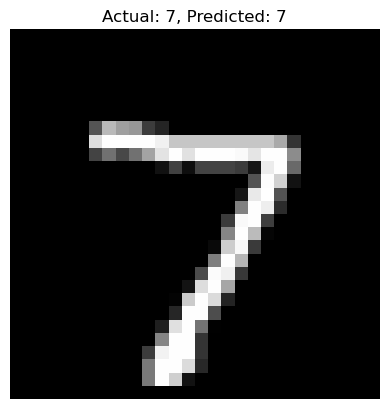

Actual Label: 7
Predicted Label: 7


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Reshape data to include channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=10)

# Step 3: Build the CNN Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Step 6: Generate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)



# Print prediction and actual for one sample
sample_index = 0  # You can change this index to see predictions for different samples
sample_image = x_test[sample_index]
sample_actual = y_true_classes[sample_index]

# Reshape the image for display
sample_image_reshaped = sample_image.reshape(28, 28)

# Make a prediction
sample_prediction = model.predict(sample_image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(sample_prediction)

# Display the image and print the results
plt.imshow(sample_image_reshaped, cmap='gray')
plt.title(f'Actual: {sample_actual}, Predicted: {predicted_label}')
plt.axis('off')
plt.show()

print(f'Actual Label: {sample_actual}')
print(f'Predicted Label: {predicted_label}')
